# Lab. IA - Genético

In [1]:
import numpy as np
import matplotlib as plt
import math
import random
import matplotlib.pyplot as plt_graph
plt_graph.rcParams['font.size'] = 12

In [2]:
Offset_funcao = 200

In [3]:
# Retirando o offset de +200 somado á função objetivo (devido a negatividade do resultado e do calculo de aptidão)
def removeOffset(resultados):
    for idx, elemento in enumerate(resultados):
        resultados[idx] = elemento - Offset_funcao
    return resultados

In [4]:
def objetivo(x, y):
    f1 = np.sin(x) * np.power(np.e, np.power(1 - np.cos(y), 2))
    f2 = np.cos(y) * np.power(np.e, np.power(1 - np.sin(x), 2))
    f3 = np.power((x-y), 2)
    funcao = (f1 + f2 + f3 + Offset_funcao)
    return funcao

In [5]:
def comparar(item):
   return item[1], item[0]

In [6]:
def initPopulacao(x_dominio, y_dominio, populacao_tam):
    pop = []
    for i in range(populacao_tam):
        x = random.randrange(x_dominio[0],x_dominio[1])
        y = random.randrange(y_dominio[0],y_dominio[1])
        pop.append([x,y])
    return pop

In [7]:
def aptidao(tamanho, posicao):
    return (0 + (100 - 0)) * ((tamanho - posicao) /  (tamanho - 1)) 

In [8]:
def cruzamento(pais, cruzamento_tx):
    alpha = random.randrange(0, 100) / 100 
    random_cruzamento = random.randrange(0, 100)
    if random_cruzamento < cruzamento_tx:
        filhos = []
        x = alpha * pais[0][0] + (1 - alpha)*pais[1][0]
        y = alpha * pais[1][1] + (1 - alpha)*pais[0][1]
        filhos.append([x, y])
        x = alpha * pais[0][0] + (1 - alpha)*pais[1][0]
        y = alpha * pais[1][1] + (1 - alpha)*pais[0][1]
        filhos.append([x, y])
        return filhos
    else:
        return pais

In [9]:
def mutacao(individuo, mutacao_tx):
    alelo_mutacao_tx = random.randrange(0, 100)
    random_mutacao = random.randrange(0, 100)
    random_alelo = random.randrange(0, 100) 
    idx = 0
    if random_mutacao < mutacao_tx:
        for alelo in individuo:
            if random_alelo < alelo_mutacao_tx:
                random_busca = random.randrange(-100, 100) / 100
                alelo =  alelo + alelo * random_busca
                individuo[idx] = alelo
            idx += 1
    return individuo

In [10]:
def roleta(fx):
    aptidao_total = sum(fx)
    selecao_aleatoria = []
    selecao_aleatoria.append(random.randrange(0, np.ceil(aptidao_total)))
    selecao_aleatoria.append(random.randrange(0, np.ceil(aptidao_total)))                                      
    selecionado = []; idx_selecionado = []; k = 0
    for i in range(len(fx)):
        if(selecao_aleatoria[0] < sum(fx[:i+1]) and (k != 1)):
            selecionado.append(fx[i])
            idx_selecionado.append(i)
            k += 1
        if(selecao_aleatoria[1] < sum(fx[:i+1])):
            selecionado.append(fx[i])
            idx_selecionado.append(i)
            k += 1
        if(k == 2):
            break
    return idx_selecionado    

In [16]:
# Iniciando população e definindo taxas de cruzamento e mutação
populacao = initPopulacao([-10,10], [-10,10], 100)
cruzamento_tx = 80; mutacao_tx = 10 # Valores em %

In [17]:
# Calculo da funcao objetivo para cada individuo ###############################
cromossomos = []; condicao_parada = 0
melhor = []; melhor_geracao = []; melhor_x_y = []; 
pior_geracao = []; media_geracao = []

for i in range(0, 100):
    print("Geração atual: " + str(i + 1) + " ============================================================================ ")
    geracao_atual = i
    #print(" * Populacao inicio: " + str(populacao))
    for idx, indiv in enumerate(populacao):
        indiv_x = indiv[0]; indiv_y = indiv[1]
        valor_funcao = objetivo(indiv_x, indiv_y)
        if len(melhor) == 0 or valor_funcao < min(melhor):
            print("Valor função: " + str(valor_funcao - Offset_funcao))
            print("Individuo: " + str(indiv))
            melhor.append(valor_funcao)
            melhor_x_y.append(indiv)
            condicao_parada = 0
        if idx == 0:
            melhor_geracao.append(valor_funcao)
            pior_geracao.append(valor_funcao)
        elif valor_funcao < melhor_geracao[geracao_atual]:
            melhor_geracao[geracao_atual] = valor_funcao  
        elif valor_funcao > pior_geracao[geracao_atual]:
            pior_geracao[geracao_atual] = valor_funcao 
        cromossomos.append([idx, valor_funcao])
    #print("\nCromossomos: " + str(cromossomos))
    
    # Media do melhor e pior valor da geração atual:
    media = ((pior_geracao[geracao_atual] - Offset_funcao) + (melhor_geracao[geracao_atual] - Offset_funcao))/2
    media_geracao.append(media)
    
    # Condição de parada antes de 100 gerações -> Não encontrou um valor menor que o melhor valor nas ultimas 20 gerações
    if melhor_geracao[geracao_atual] > min(melhor):
        condicao_parada += 1
        
    if condicao_parada == 20:
        break
        
    # Calculo da aptidão de cada individuo ########################################
    ranking = []; ranking = cromossomos
    ranking = sorted(cromossomos, key = comparar)
    #print("Ranking: " + str(ranking))

    fx = []
    for idx, valor in enumerate(ranking):
        fx.append(aptidao(len(ranking), idx))
    #print("Aptidões: " + str(fx))

    # Roleta dos individuos selecionados ###########################################
    #print("Cromossomos: " + str(cromossomos))
    populacao_prox_gen = []
    for i in range(0, int(len(populacao)/2)):
        selecionados_cruzamento = roleta(fx)
        #print("Roleta: " + str(selecionados_cruzamento))
        idx1_populacao = ranking[selecionados_cruzamento[0]][0]
        indiv1_populacao = populacao[idx1_populacao]
        idx2_populacao = ranking[selecionados_cruzamento[1]][0]
        indiv2_populacao = populacao[idx2_populacao]

        # Cruzamento dos individuos selecionados ########################################
        pais = []; pais.append(indiv1_populacao); pais.append(indiv2_populacao)
        filhos = cruzamento(pais, cruzamento_tx) 
        # Mutação dos individuos selecionados ###########################################
        filhos[0] = mutacao(filhos[0], mutacao_tx)
        filhos[1] = mutacao(filhos[1], mutacao_tx)
        populacao_prox_gen.append(filhos[0])
        populacao_prox_gen.append(filhos[1])
        #print(populacao_prox_gen)
    populacao = populacao_prox_gen
    #print("\n* População fim: " + str(populacao) + "\n\n")
#print("\n\n Geração final: " + str(populacao))

Geração atual: 1 ============================================================================ 
Valor função: 37.96523765180231
Individuo: [5, 7]
Valor função: 2.2144289729222066
Individuo: [6, 8]
Valor função: -69.54332004942216
Individuo: [-1, -3]
Geração atual: 2 ============================================================================ 
Valor função: -79.7529019825631
Individuo: [-7.6499999999999995, -3.3499999999999996]
Valor função: -84.54531926658845
Individuo: [-7.72, -3.28]
Geração atual: 3 ============================================================================ 
Geração atual: 4 ============================================================================ 
Geração atual: 5 ============================================================================ 
Geração atual: 6 ============================================================================ 
Valor função: -85.20626942511687
Individuo: [-1.2767009999999994, -3.409999]
Valor função: -88.98432742980773
Individuo: [-1.747286

In [18]:
melhor_geracao = removeOffset(melhor_geracao)
pior_geracao = removeOffset(pior_geracao)
melhor = removeOffset(melhor)

In [37]:
print("\nMelhor resultado geral: " + str(min(melhor)))
print("Melhor X e Y: " + str(melhor_x_y[len(melhor) - 1]))
print("* O melhor resultado foi obtido na geração: " + str(melhor_geracao.index(min(melhor)) + 1))


Melhor resultado geral: -106.55663979907229
Melhor X e Y: [-1.5449347691999993, -3.1413114876000003]
* O melhor resultado foi obtido na geração: 7


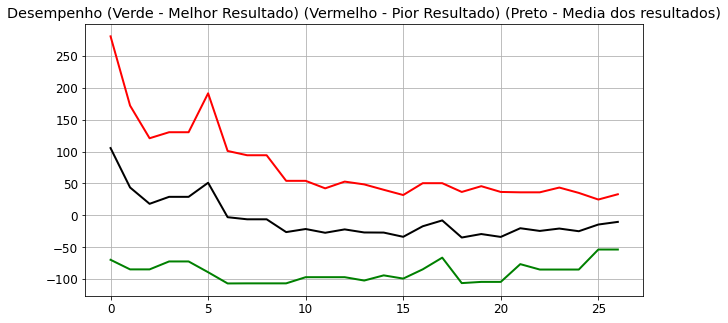

In [41]:
x_melhor = range(0, len(melhor_geracao))
y_melhor = melhor_geracao

x_pior = x_melhor
y_pior = pior_geracao

x_media = x_pior
y_media = media_geracao

plt_graph.figure(figsize=(10, 5))
plt_graph.title("Desempenho (Verde - Melhor Resultado) (Vermelho - Pior Resultado) (Preto - Media dos resultados)")
plt_graph.plot(x_melhor, y_melhor, markersize = 6, color = "green", linewidth = 2)
plt_graph.plot(x_pior, y_pior, markersize = 6, color = "red", linewidth = 2)
plt_graph.plot(x_media, y_media, markersize = 6, color = "black", linewidth = 2)
plt_graph.grid(True)
plt_graph.show()